# 1. Importing Necessary Libraries

In [72]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 2. Reading the Dataset into Pandas Dataframe

In [73]:
df = pd.read_csv('Netflix Dataset.csv')

# 3. Data Preprocessing

## Initial Inspection

In [74]:
df.shape

(7789, 11)

In [75]:
df.head()

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7789 entries, 0 to 7788
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Show_Id       7789 non-null   object
 1   Category      7789 non-null   object
 2   Title         7789 non-null   object
 3   Director      5401 non-null   object
 4   Cast          7071 non-null   object
 5   Country       7282 non-null   object
 6   Release_Date  7779 non-null   object
 7   Rating        7782 non-null   object
 8   Duration      7789 non-null   object
 9   Type          7789 non-null   object
 10  Description   7789 non-null   object
dtypes: object(11)
memory usage: 669.5+ KB


## Looking for Duplicates

In [77]:
dups = df.duplicated(keep=False)

In [78]:
df[dups]

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
683,s684,Movie,Backfire,Dave Patten,"Black Deniro, Byron ""Squally"" Vinson, Dominic ...",United States,"April 5, 2019",TV-MA,97 min,"Dramas, Independent Movies, Thrillers",When two would-be robbers accidentally kill a ...
4839,s6621,Movie,The Lost Okoroshi,Abba T. Makama,"Seun Ajayi, Judith Audu, Tope Tedela, Ifu Enna...",Nigeria,"September 4, 2020",TV-MA,94 min,"Comedies, Dramas, Independent Movies",A disillusioned security guard transforms into...
6300,s684,Movie,Backfire,Dave Patten,"Black Deniro, Byron ""Squally"" Vinson, Dominic ...",United States,"April 5, 2019",TV-MA,97 min,"Dramas, Independent Movies, Thrillers",When two would-be robbers accidentally kill a ...
6622,s6621,Movie,The Lost Okoroshi,Abba T. Makama,"Seun Ajayi, Judith Audu, Tope Tedela, Ifu Enna...",Nigeria,"September 4, 2020",TV-MA,94 min,"Comedies, Dramas, Independent Movies",A disillusioned security guard transforms into...


- 2 exact duplicates are observed.
- Thus, we will drop them to avoid redundancy

In [79]:
df.drop_duplicates(inplace=True)

## Null Value Handling

In [80]:
df.isnull().sum()

Show_Id            0
Category           0
Title              0
Director        2388
Cast             718
Country          507
Release_Date      10
Rating             7
Duration           0
Type               0
Description        0
dtype: int64

- `Director` contains 2388 null values out of 7789 (~30.6%)
- `Cast` contains 718 null values out of 7789 (~9.2%)
- `Country` contains 507 null values out of 7789 (~6.5%)
- `Release_Date` contains 10 null values out of 7789 (~0.12%)
- `Rating` contains 7 null values (~0.08%)

In [81]:
df['Director'].fillna('Unknown', inplace=True)
df['Cast'].fillna('Not Available', inplace=True)
df['Country'].fillna('Unknown', inplace=True)
df['Rating'].fillna('Not Rated', inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_24048\2579504704.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Director'].fillna('Unknown', inplace=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_24048\2579504704.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, wh

In [82]:
df.isnull().sum()

Show_Id          0
Category         0
Title            0
Director         0
Cast             0
Country          0
Release_Date    10
Rating           0
Duration         0
Type             0
Description      0
dtype: int64

`Release_Date` only has 10 null values which I was about to drop. However, I quickly remembered that doing so may drop reputable shows and movies that could just have misplaced or missing dates. Thus, I choose to first inspect the rows containing these nulls.

In [83]:
df[df['Release_Date'].isnull()]

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
258,s259,TV Show,A Young Doctor's Notebook and Other Stories,Unknown,"Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...",United Kingdom,NaN,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ..."
549,s550,TV Show,Anthony Bourdain: Parts Unknown,Unknown,Anthony Bourdain,United States,NaN,TV-PG,5 Seasons,Docuseries,This CNN original series has chef Anthony Bour...
2263,s2264,TV Show,Frasier,Unknown,"Kelsey Grammer, Jane Leeves, David Hyde Pierce...",United States,NaN,TV-PG,11 Seasons,"Classic & Cult TV, TV Comedies",Frasier Crane is a snooty but lovable Seattle ...
2288,s2289,TV Show,Friends,Unknown,"Jennifer Aniston, Courteney Cox, Lisa Kudrow, ...",United States,NaN,TV-14,10 Seasons,"Classic & Cult TV, TV Comedies",This hit sitcom follows the merry misadventure...
2555,s2556,TV Show,Gunslinger Girl,Unknown,"Yuuka Nanri, Kanako Mitsuhashi, Eri Sendai, Am...",Japan,NaN,TV-14,2 Seasons,"Anime Series, Crime TV Shows","On the surface, the Social Welfare Agency appe..."
3374,s3375,TV Show,Kikoriki,Unknown,Igor Dmitriev,Unknown,NaN,TV-Y,2 Seasons,Kids' TV,A wacky rabbit and his gang of animal pals hav...
3492,s3493,TV Show,La Familia P. Luche,Unknown,"Eugenio Derbez, Consuelo Duval, Luis Manuel Áv...",United States,NaN,TV-14,3 Seasons,"International TV Shows, Spanish-Language TV Sh...","This irreverent sitcom featues Ludovico, Feder..."
3946,s3947,TV Show,Maron,Unknown,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...",United States,NaN,TV-MA,4 Seasons,TV Comedies,"Marc Maron stars as Marc Maron, who interviews..."
5138,s5138,TV Show,Red vs. Blue,Unknown,"Burnie Burns, Jason Saldaña, Gustavo Sorola, G...",United States,NaN,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil..."
6066,s6066,TV Show,The Adventures of Figaro Pho,Unknown,"Luke Jurevicius, Craig Behenna, Charlotte Haml...",Australia,NaN,TV-Y7,2 Seasons,"Kids' TV, TV Comedies","Imagine your worst fears, then multiply them: ..."


- As expected, these are all very popular and famous shows.
- Considering the fact there are only 10 rows, I have decided to manually fill them using the internet.

In [84]:
dfnull_release_map = {
    "A Young Doctor's Notebook and Other Stories": "December 6, 2012",
    "Anthony Bourdain: Parts Unknown": "April 14, 2013",
    "Frasier": "September 16, 1993",
    "Friends": "September 23, 1994",
    "Gunslinger Girl": "October 9, 2003",
    "Kikoriki": "May 17, 2004",
    "La Familia P. Luche": "August 7, 2002",
    "Maron": "May 3, 2013",
    "Red vs. Blue": "April 1, 2003",
    "The Adventures of Figaro Pho": "October 31, 2012"
}

df['Release_Date'] = df['Release_Date'].fillna(df['Title'].map(dfnull_release_map))

## Checking and Converting dtypes

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7787 entries, 0 to 7788
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Show_Id       7787 non-null   object
 1   Category      7787 non-null   object
 2   Title         7787 non-null   object
 3   Director      7787 non-null   object
 4   Cast          7787 non-null   object
 5   Country       7787 non-null   object
 6   Release_Date  7787 non-null   object
 7   Rating        7787 non-null   object
 8   Duration      7787 non-null   object
 9   Type          7787 non-null   object
 10  Description   7787 non-null   object
dtypes: object(11)
memory usage: 730.0+ KB


- Most of the features are correctly represented except `Release_Date` which needs to be converted to DateTime

In [86]:
df['Release_Date'] = df['Release_Date'].str.strip()

df['Release_Date'] = pd.to_datetime(df['Release_Date'])

In [87]:
df.sample(5)

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
1413,s1414,TV Show,Cleo & Cuquin,Fernando Moro,Not Available,Spain,2020-07-01,TV-Y,2 Seasons,Kids' TV,Spirited sister-brother duo Cleo and Cuquín tr...
3546,s3547,Movie,Latte and the Magic Waterstone,"Regina Welker, Nina Wels","Ashley Bornancin, Carter Hastings",Germany,2020-07-31,TV-Y,83 min,"Children & Family Movies, Comedies",When a greedy bear steals a magic stone to kee...
4897,s4897,Movie,Pokémon the Movie: I Choose You!,Kunihiko Yuyama,"Ikue Otani, Sarah Natochenny, David Oliver Nel...",Japan,2019-01-01,TV-Y7,97 min,"Anime Features, Children & Family Movies",When Ash tries to pick his first Pokémon on hi...
3646,s3647,Movie,Lincoln,Steven Spielberg,"Daniel Day-Lewis, Sally Field, David Strathair...","United States, India",2018-02-21,PG-13,150 min,Dramas,Director Steven Spielberg takes on the towerin...
3873,s3874,Movie,"Main, Meri Patni Aur Woh",Chandan Arora,"Rajpal Yadav, Rituparna Sengupta, Kay Kay Meno...",India,2018-10-01,TV-PG,129 min,"Comedies, Dramas, International Movies",An ordinary-looking guy weds the woman of his ...


## Feature Engineering

- The duration of shows are measured in seasons whereas Movies are done so in minutes.
- We will create 2 additional columns to get a numeric Duration_Value with Duration_Unit for Movies and Shows

In [88]:
df[['Duration_Value', 'Duration_Unit']] = df['Duration'].str.extract(r'(\d+)\s*(\w+)')

df['Duration_Value'] = df['Duration_Value'].astype(float)

In [89]:
df.head()

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Duration_Value,Duration_Unit
0,s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,4.0,Seasons
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,93.0,min
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",78.0,min
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",80.0,min
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,123.0,min


- We will now create two more columns to separate the Release_Date into year and month for better analysis

In [90]:
df['Release_Year'] = df['Release_Date'].dt.year
df['Release_Month'] = df['Release_Date'].dt.month_name()

In [91]:
df.sample()

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Duration_Value,Duration_Unit,Release_Year,Release_Month
3120,s3121,Movie,Janaan,Azfar Jafri,"Armeena Rana Khan, Bilal Ashraf, Ali Rehman Kh...",Pakistan,2017-09-15,TV-14,132 min,"Comedies, Dramas, International Movies","After 11 years in Canada, young Meena returns ...",132.0,min,2017,September


## Quick Outlier Check for Year of Release

{'whiskers': [<matplotlib.lines.Line2D at 0x28dfae1e200>,
 'caps': [<matplotlib.lines.Line2D at 0x28dfae1c580>,
 'boxes': [<matplotlib.lines.Line2D at 0x28dfae1dba0>],
 'medians': [<matplotlib.lines.Line2D at 0x28dfae1e950>],
 'fliers': [<matplotlib.lines.Line2D at 0x28dfae1eb60>],
 'means': []}

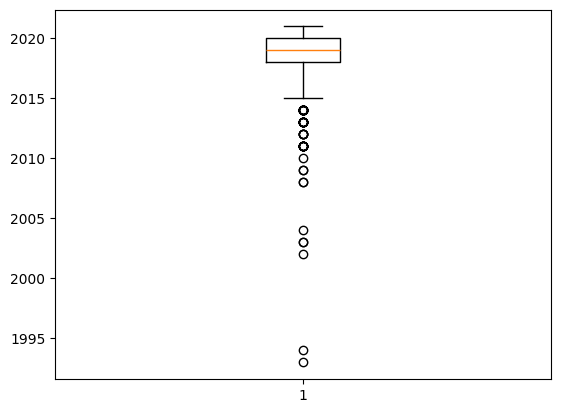

In [92]:
import matplotlib.pyplot as plt
plt.boxplot(df['Release_Year'])

# 4. Exploratory Data Analysis

## Overall Distribution of Movies vs Shows

C:\Users\HP\AppData\Local\Temp\ipykernel_24048\547013038.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Category', palette='Set2')


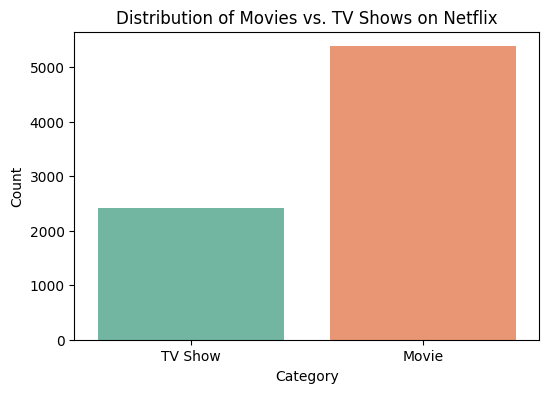

In [93]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Category', palette='Set2')
plt.title('Distribution of Movies vs. TV Shows on Netflix')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

Overall, movies dominate, but TV Shows have a growing presence which reflects Netflix's expansion into serialized content

## Trend Over the Years

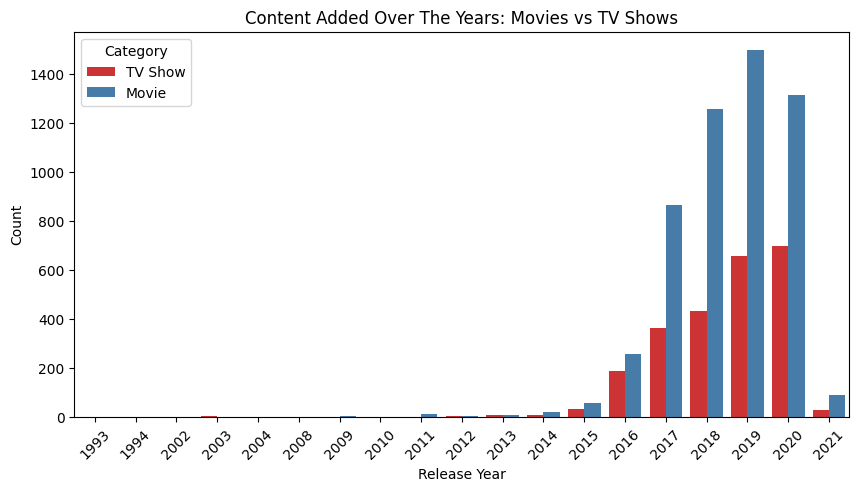

In [94]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='Release_Year', hue='Category', palette='Set1')
plt.title('Content Added Over The Years: Movies vs TV Shows')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Category')
plt.show()

A surge in TV Shows after 2015 indicates Netflix Originals strategy whereas movies remain consistently added

## Top 10 Most Common Genres

C:\Users\HP\AppData\Local\Temp\ipykernel_24048\13651228.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(genres), palette='viridis')


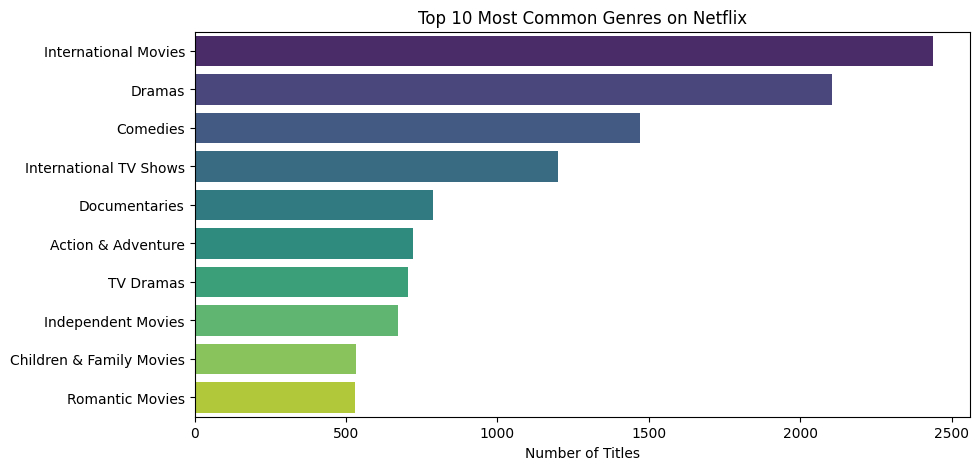

In [95]:
from collections import Counter
import itertools

# Genres are comma-separated; split and flatten
all_genres = list(itertools.chain.from_iterable(df['Type'].str.split(', ')))
top_genres = Counter(all_genres).most_common(10)

genres, counts = zip(*top_genres)

plt.figure(figsize=(10,5))
sns.barplot(x=list(counts), y=list(genres), palette='viridis')
plt.title('Top 10 Most Common Genres on Netflix')
plt.xlabel('Number of Titles')
plt.show()


Genres like International Movies, Dramas, and Comedies dominate, showing audience preference and content focus. International Movies have the highest number of titles, which is nearly 2500 title. Dramas and Comedies trail behind.

## Top 5 Genres

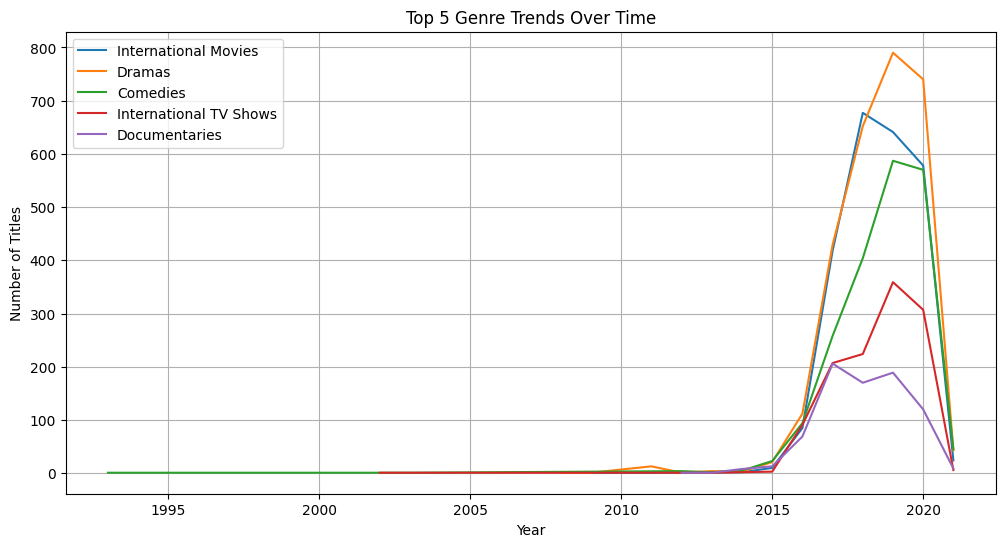

In [96]:
top5_genres = [g for g, _ in Counter(all_genres).most_common(5)]
df_genre = df[df['Type'].str.contains('|'.join(top5_genres))]

plt.figure(figsize=(12,6))
for genre in top5_genres:
    genre_df = df_genre[df_genre['Type'].str.contains(genre)]
    genre_df.groupby('Release_Year').size().plot(label=genre)
plt.title('Top 5 Genre Trends Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Titles')
plt.legend()
plt.grid(True)
plt.show()

The post-2015 spike in Movies vs. TV Shows depicts a sharp increase in all genres. However, it is seen that here Dramas had the most growth with International Movies close behind.

## Top Countries

C:\Users\HP\AppData\Local\Temp\ipykernel_24048\1625263279.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette='coolwarm')


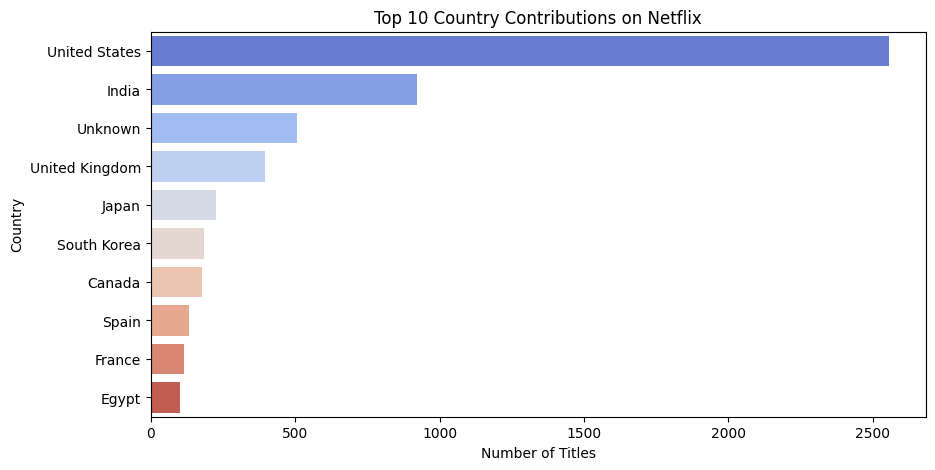

In [97]:
top_countries = df['Country'].value_counts().nlargest(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_countries.values, y=top_countries.index, palette='coolwarm')
plt.title('Top 10 Country Contributions on Netflix')
plt.xlabel('Number of Titles')
plt.show()

United States has the highest number of contributions with India, and UK far behind. Later following are Japan, South Korea, Canada, Spain, France, and Egypt.

## Movies vs. TV Shows by Country

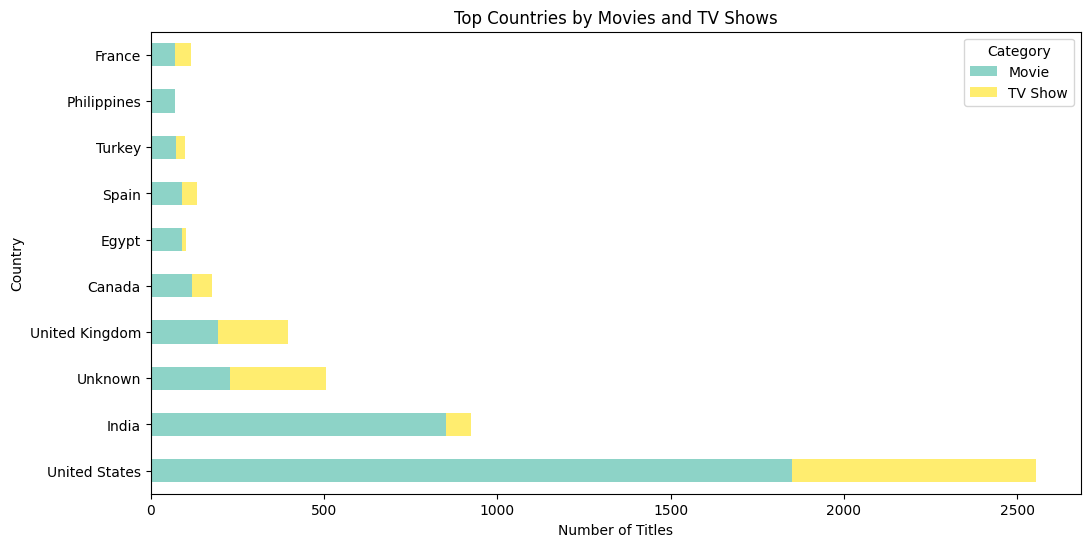

In [98]:
country_category = df.groupby(['Country','Category']).size().unstack().fillna(0)
country_category_top = country_category.nlargest(10, 'Movie')

country_category_top.plot(kind='barh', stacked=True, figsize=(12,6), colormap='Set3')
plt.title('Top Countries by Movies and TV Shows')
plt.xlabel('Number of Titles')
plt.show()

The two leading countries i.e United States and India have contributed more Movies than Shows but for the United Kingdom, there seems to a balance between Movies and Shows

## Distribution of Movie Duration vs TV Show Seasons

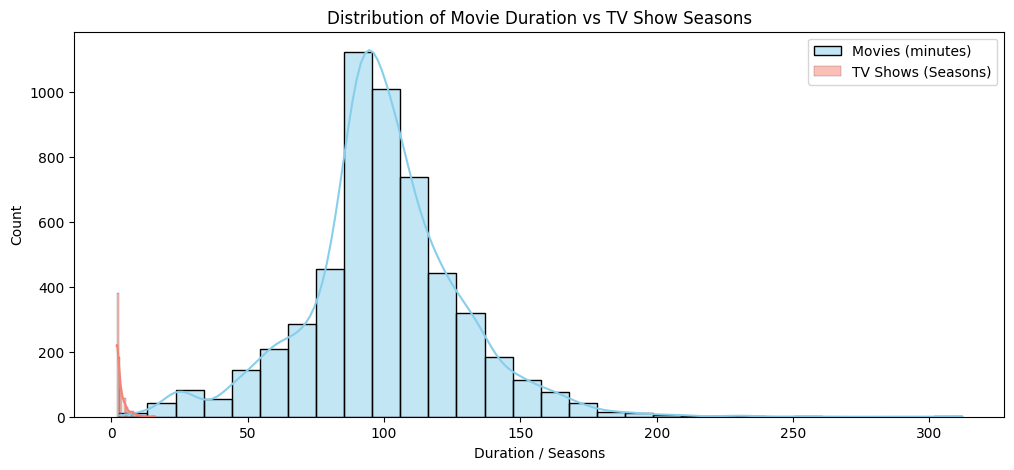

In [99]:
plt.figure(figsize=(12,5))
sns.histplot(df[df['Duration_Unit']=='min']['Duration_Value'], bins=30, kde=True, color='skyblue', label='Movies (minutes)')
sns.histplot(df[df['Duration_Unit']=='Seasons']['Duration_Value'], bins=20, kde=True, color='salmon', label='TV Shows (Seasons)')
plt.title('Distribution of Movie Duration vs TV Show Seasons')
plt.xlabel('Duration / Seasons')
plt.ylabel('Count')
plt.legend()
plt.show()

- Most movies are around 90-120 minmutes long
- TV Shows mostly have 1-3 seasons

## Average Duration by Category Over Years

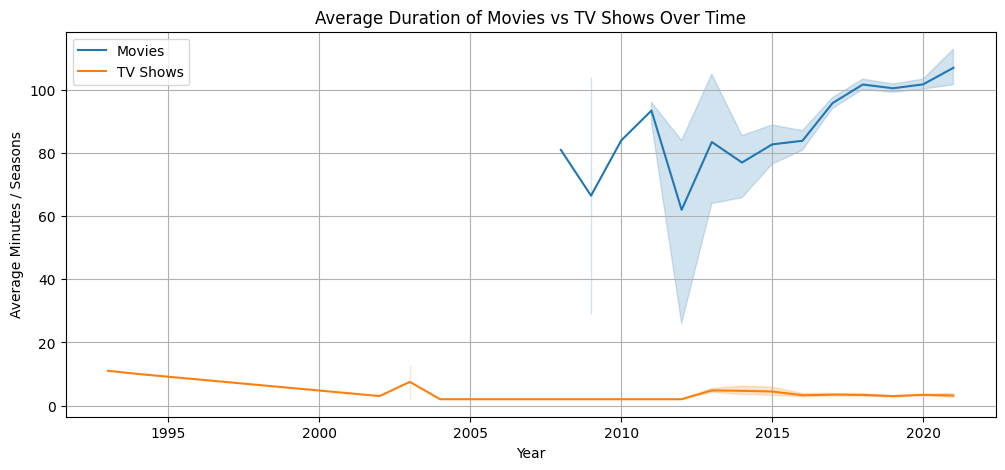

In [100]:
avg_duration = df.copy()
avg_duration['Duration_Value'] = avg_duration['Duration_Value'].astype(float)

plt.figure(figsize=(12,5))
sns.lineplot(data=avg_duration[avg_duration['Duration_Unit']=='min'], x='Release_Year', y='Duration_Value', label='Movies')
sns.lineplot(data=avg_duration[avg_duration['Duration_Unit']=='Seasons'], x='Release_Year', y='Duration_Value', label='TV Shows')
plt.title('Average Duration of Movies vs TV Shows Over Time')
plt.ylabel('Average Minutes / Seasons')
plt.xlabel('Year')
plt.grid(True)
plt.show()

Movies show a slight increase in runtime over the years, whereas TV Shows mai ntain relatively stable season counts with occasional tiny spikes

## Content Ratings Distribution

C:\Users\HP\AppData\Local\Temp\ipykernel_24048\1052515916.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Rating', order=df['Rating'].value_counts().index, palette='magma')


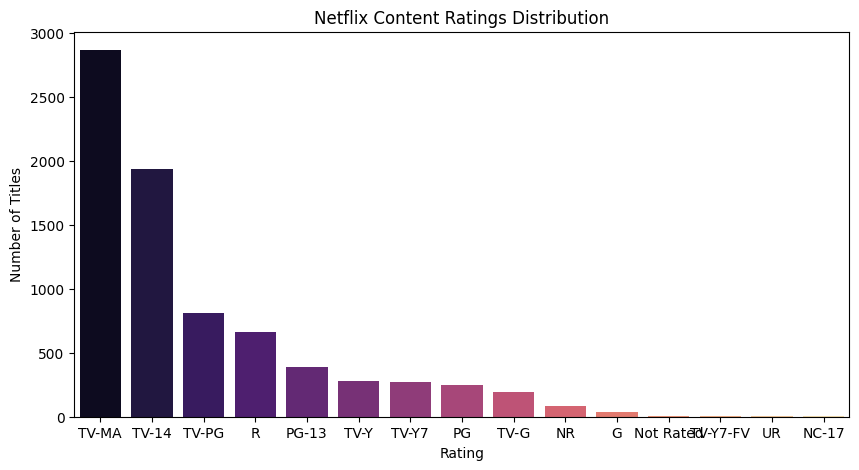

In [101]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='Rating', order=df['Rating'].value_counts().index, palette='magma')
plt.title('Netflix Content Ratings Distribution')
plt.xlabel('Rating')
plt.ylabel('Number of Titles')
plt.show()

TV-MA and TV-14 dominate showing that Netlfliz targets mature and teen audiences primarily

## Heatmap: Genre vs Category

C:\Users\HP\AppData\Local\Temp\ipykernel_24048\239365411.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top_genres[genre] = df_top_genres['Type'].str.contains(genre).astype(int)
C:\Users\HP\AppData\Local\Temp\ipykernel_24048\239365411.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top_genres[genre] = df_top_genres['Type'].str.contains(genre).astype(int)
C:\Users\HP\AppData\Local\Temp\ipykernel_24048\239365411.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fro

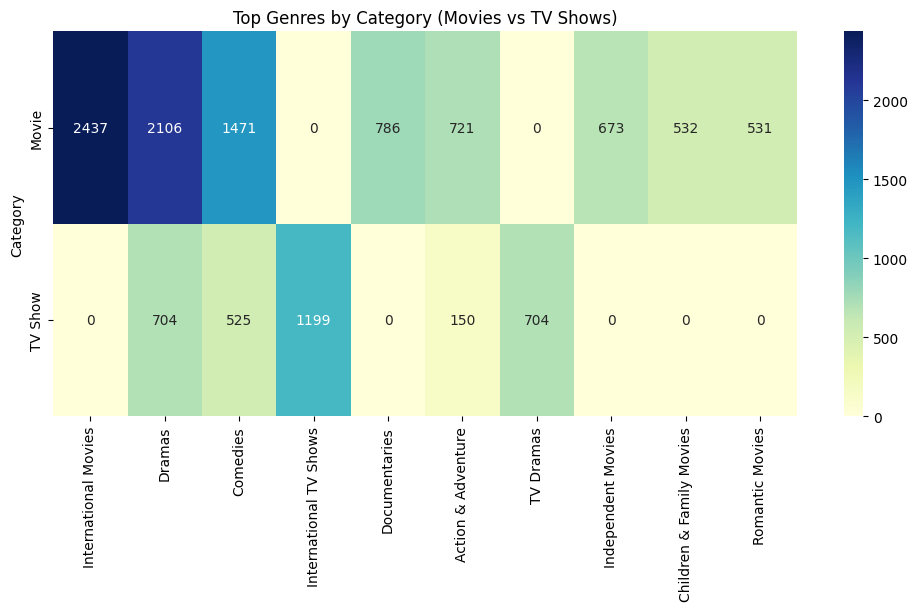

In [102]:
top10_genres = [g for g, _ in Counter(all_genres).most_common(10)]
df_top_genres = df[df['Type'].str.contains('|'.join(top10_genres))]

for genre in top10_genres:
    df_top_genres[genre] = df_top_genres['Type'].str.contains(genre).astype(int)

genre_category = df_top_genres.groupby('Category')[top10_genres].sum()

plt.figure(figsize=(12,5))
sns.heatmap(genre_category, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Top Genres by Category (Movies vs TV Shows)')
plt.show()